In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
m = 100
X = 6*np.random.rand(m,1) - 3    #产生[0-3)的数据
y = 0.5*X**2+X+np.random.randn(m,1)    #定义方程

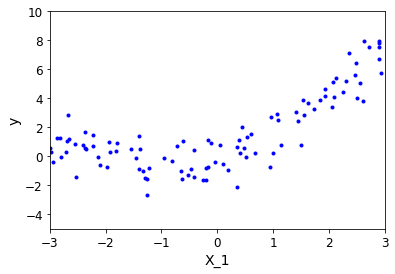

In [8]:
plt.plot(X,y,'b.')
plt.xlabel('X_1')
plt.ylabel('y')
plt.axis([-3,3,-5,10])
plt.show()

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2,include_bias = False)    #不带偏置项的平方项
X_poly = poly_features.fit_transform(X)    #[X,X^2]


In [10]:
print(X[0])
print(X_poly[0])

[-2.3495612]
[-2.3495612   5.52043784]


In [11]:
2.3495612**2

5.520437832545441

In [12]:
'''线性回归'''
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)    #训练模型  0.92*X+0.52*X^2-0.037
print(lin_reg.coef_)     #权重参数
print(lin_reg.intercept_)    #偏置参数

[[1.04404157 0.50754805]]
[-0.04667964]


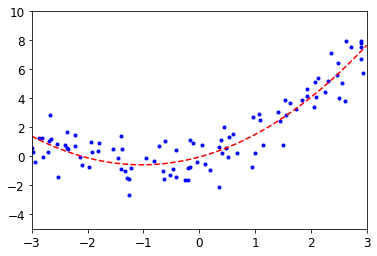

In [14]:
X_new=np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new=lin_reg.predict(X_new_poly)
plt.plot(X,y,'b.')
plt.plot(X_new,y_new,'r--',label='prediction')
plt.axis([-3,3,-5,10])
plt.show()

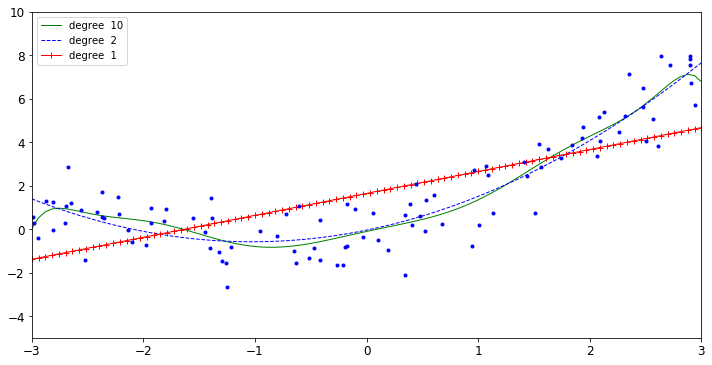

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
plt.figure(figsize=(12,6))
for style,width,degree in (('g-',1,10),('b--',1,2),('r-+',1,1)):
    '''
    degree: 维数
    '''
    poly_features = PolynomialFeatures(degree=degree,include_bias=False)
    std=StandardScaler()    #标准化
    lin_reg=LinearRegression()   #回归
    
    polynomial_reg=Pipeline([('poly_features',poly_features),('StandardScaler',std),('lin_reg',lin_reg)])
    polynomial_reg.fit(X,y)
    y_new_2=polynomial_reg.predict(X_new)
    plt.plot(X_new,y_new_2,style,label='degree  '+str(degree),linewidth=width)
plt.plot(X,y,'b.')
plt.axis([-3,3,-5,10])
plt.legend()
plt.show()